## Homework #5. Exploratory Data Analysis
#### Author: `Maksym Sabadyshyn`
#### Total time spent on h/w (in minutes): 800

In [97]:
import pandas as pd
import ast
import json
import datetime
import numpy as np
import matplotlib.pyplot as plt
import re 
import datetime
import datetime

import matplotlib.pyplot as plt
import datetime

In [98]:
DIALOGS_MERGED_DATA_PATH = "/Users/maksymsabadyshyn/Desktop/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "/Users/maksymsabadyshyn/Desktop/data/merged_data/dialogs_users_all.csv"

In [99]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH).dropna()

pd.options.display.max_colwidth = 1000
df1 = df

df_meta["users"] = df_meta["users"].apply(lambda row: ast.literal_eval(row))
df_meta.users.dropna().apply(pd.Series)
df_meta = df_meta.drop('users', 1).assign(**df_meta.users.dropna().apply(pd.Series))

<ipython-input-99-86c294bd1626>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_meta = df_meta.drop('users', 1).assign(**df_meta.users.dropna().apply(pd.Series))


In [100]:
group_recipients = df_meta[df_meta["type"] == "Group"]
message_id_to_me = list(filter(lambda ids: ids != "PeerUser(user_id=262442341)", df1["from_id"]))

individual_recipients = df_meta[df_meta["type"] == "Private dialog"].copy()
individual_recipients = individual_recipients[individual_recipients["user_id"] != 262442341]
individual_recipients["number_of_shared_groups"] = individual_recipients.apply(lambda row: list(group_recipients["user_id"]).count(int(row["user_id"])), axis=1)
individual_recipients["number_of_messages"] = individual_recipients.apply(lambda row: message_id_to_me.count("PeerUser(user_id=" + str(row["user_id"]) + ")"), axis=1)

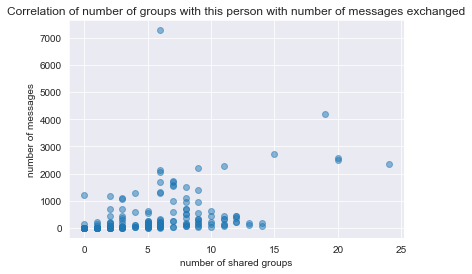

In [101]:
import numpy as np
import matplotlib.pyplot as plt

x = individual_recipients["number_of_shared_groups"]
y = individual_recipients["number_of_messages"]

plt.scatter(x, y, alpha=0.5)
plt.title("Correlation of number of groups with this person with number of messages exchanged")
plt.xlabel("number of shared groups")
plt.ylabel("number of messages")
plt.show()

In [102]:
private_dialogues = df_meta[df_meta["type"] == "Private dialog"]
private_dialogues_users_with_phone = private_dialogues[private_dialogues["phone"] != None] #list(filter(lambda x: x["phone"] != None, private_dialogues))
private_dialogues_users_without_phone = private_dialogues[private_dialogues["phone"] == None] #list(filter(lambda x: x["phone"] == None, private_dialogues))

private_dialogues_users_with_phone

group_recipients = df_meta[df_meta["type"] == "Group"]["user_id"]

message_id_to_me = list(filter(lambda ids: ids != "PeerUser(user_id=262442341)", df1["from_id"])) 

In [103]:
individual_recipients = df_meta[df_meta["type"] == "Private dialog"].copy()
has_number_recipients = individual_recipients[~individual_recipients["phone"].isin([None])]
no_number_recipients = individual_recipients[individual_recipients["phone"].isin([None])]
has_number_recipients["user_id"] = has_number_recipients["user_id"]
no_number_recipients["user_id"] = no_number_recipients["user_id"]

has_number_recipients_msg = df1[df1["to_id"].isin(list(has_number_recipients["user_id"].astype('str')))]
no_number_recipients_msg = df1[df1["to_id"].isin(list(no_number_recipients["user_id"].astype('str')))]

total_number_of_messages = len(has_number_recipients_msg) + len(no_number_recipients_msg)


<ipython-input-103-84fe8ff1313e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_number_recipients["user_id"] = has_number_recipients["user_id"]
<ipython-input-103-84fe8ff1313e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_number_recipients["user_id"] = no_number_recipients["user_id"]


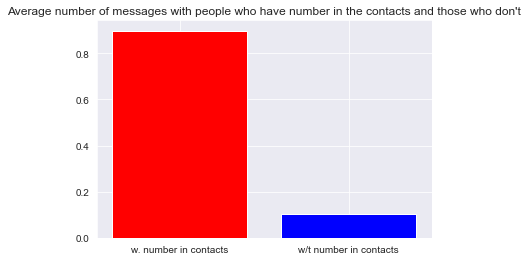

In [104]:

plt.bar('w. number in contacts', len(has_number_recipients_msg) / total_number_of_messages, color='r')
plt.bar('w/t number in contacts', len(no_number_recipients_msg) / total_number_of_messages, color='b')
plt.title("Average number of messages with people who have number in the contacts and those who don't")
plt.show()

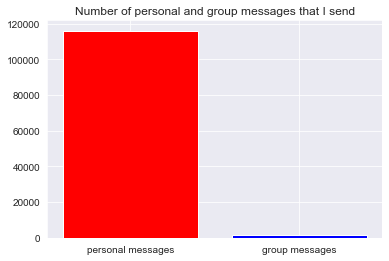

In [105]:
my_id = "262442341"
messages_from_me = df1[df1["from_id"] == "PeerUser(user_id=" + my_id + ")"]
group_messages_from_me = messages_from_me[messages_from_me["to_id"].str.contains("PeerChannel")]

plt.title("Number of personal and group messages that I send")
plt.bar('personal messages', len(messages_from_me) - len(group_messages_from_me), color='r')
plt.bar('group messages', len(group_messages_from_me), color='b')
plt.show()

<ipython-input-106-b653a7698287>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_messages_from_me["date"] = pd.to_datetime(df['date'], errors='coerce')


<AxesSubplot: title={'center': 'Group messages activity over time'}, xlabel='date'>

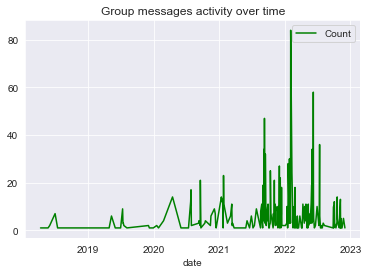

In [106]:
my_id = "262442341"
messages_from_me = df1[df1["from_id"] == "PeerUser(user_id=" + my_id + ")"]
group_messages_from_me = messages_from_me[messages_from_me["to_id"].str.contains("PeerChannel")]

group_messages_from_me["date"] = pd.to_datetime(df['date'], errors='coerce')
grouped_by_date = group_messages_from_me['date'].dt.date.value_counts().sort_index().reset_index()

grouped_by_date.columns = ['date','Count']
grouped_by_date.plot(title = 'Group messages activity over time',
                     kind = 'line',
                     x = 'date',
                     y = 'Count',
                     color = 'green')

<ipython-input-107-56b023e3fbb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_messages_from_me["date"] = pd.to_datetime(df['date'], errors='coerce')


<AxesSubplot: title={'center': 'Private messages activity over time'}, xlabel='date'>

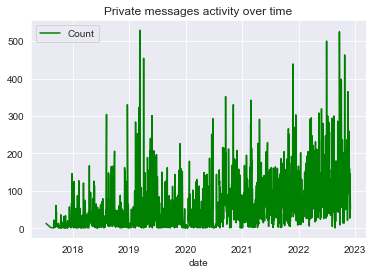

In [107]:
my_id = "262442341"
messages_from_me = df1[df1["from_id"] == "PeerUser(user_id=" + my_id + ")"]
group_messages_from_me = messages_from_me[~messages_from_me["to_id"].str.contains("PeerChannel")]

group_messages_from_me["date"] = pd.to_datetime(df['date'], errors='coerce')
grouped_by_date = group_messages_from_me['date'].dt.date.value_counts().sort_index().reset_index()

grouped_by_date.columns = ['date','Count']

grouped_by_date.plot(title = 'Private messages activity over time',
                     kind = 'line',
                     x = 'date',
                     y = 'Count',
                     color = 'green')

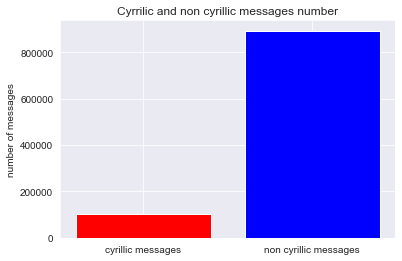

In [108]:
def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

non_na_msg = df1[df1['message'].notna()]

cyrillic_mask = non_na_msg.message.apply(has_cyrillic)
cyrillic_msg = non_na_msg[cyrillic_mask]


my_id = "262442341"
cyrillic_messages_from_me = cyrillic_msg[cyrillic_msg["from_id"] == "PeerUser(user_id=" + my_id + ")"]

plt.title("Cyrrilic and non cyrillic messages number")
plt.ylabel("number of messages")
plt.bar('cyrillic messages', len(cyrillic_messages_from_me), color='r')
plt.bar('non cyrillic messages', len(non_na_msg) - len(cyrillic_messages_from_me), color='b')
plt.show()

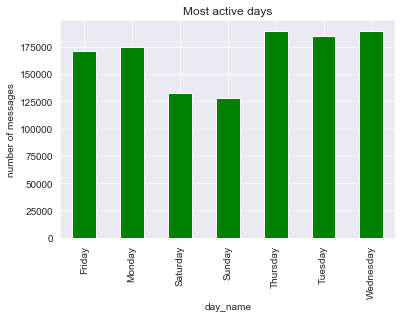

In [109]:
df_time = df1
df_time["date"] = pd.to_datetime(df_time['date'], errors='coerce')
df_time["day_name"] = df_time["date"].dt.strftime("%A")

messages_count = df_time.groupby("day_name")["day_name"].count()
messages_count.columns = ['day_name','count']

messages_count.plot(kind = 'bar',
        x = 'day_name',
        y = 'count',
        color = 'green')
  
plt.title('Most active days')
plt.ylabel("number of messages")
plt.show()

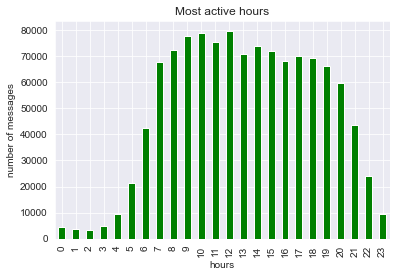

In [110]:
#changes of activity periods over time
df_time = df1
df_time["date"] = pd.to_datetime(df_time['date'], errors='coerce')
df_time["hours"] = df_time["date"].dt.hour

messages_count = df_time.groupby("hours")["day_name"].count()
messages_count.columns = ['hours','count']

messages_count.plot(kind = 'bar',
        x = 'hours',
        y = 'count',
        color = 'green')
  
plt.title('Most active hours')
plt.ylabel("number of messages")
plt.show()

In [111]:
import emoji
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

df1["date"] = pd.to_datetime(df1['date'], errors='coerce')

my_id = "262442341"
sticker_messages = df1.where(df1["type"] == 'sticker')
mine_sticker_messages = sticker_messages[sticker_messages["from_id"] == "PeerUser(user_id=" + my_id + ")"]
messages_count = mine_sticker_messages.groupby("message")["message"].count()
messages_count

message
☀️     1
☕️     1
☝      3
☠️    12
☹️     1
      ..
🥺     30
🦠      1
🧐      3
🧠      1
🫠      1
Name: message, Length: 181, dtype: int64

<AxesSubplot: title={'center': 'Usage of stickers over time'}, xlabel='date'>

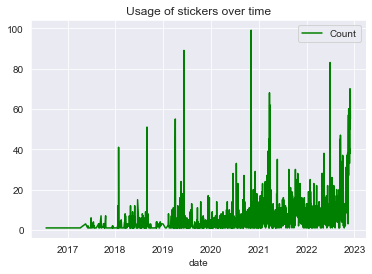

In [112]:
#usage of stickers over time
import matplotlib.pyplot as plt

df1["date"] = pd.to_datetime(df1['date'], errors='coerce')

sticker_messages = df1.where(df1["type"] == 'sticker')

grouped_by_date = sticker_messages['date'].dt.date.value_counts().sort_index().reset_index()

grouped_by_date.columns = ['date','Count']

grouped_by_date.plot(title="Usage of stickers over time",
                     kind = 'line',
                     x = 'date',
                     y = 'Count',
                     color = 'green')

<ipython-input-113-16826af4389a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["date"] = pd.to_datetime(df1['date'], errors='coerce')


<AxesSubplot: title={'center': 'Usage of word тривога'}, xlabel='date'>

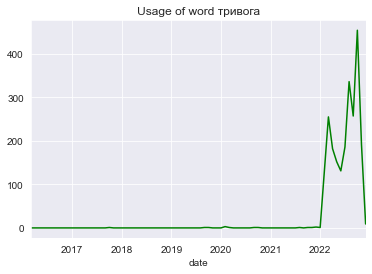

In [113]:
#### usage of word тривога

df1 = df1[df1['message'].notna()]
df1["date"] = pd.to_datetime(df1['date'], errors='coerce')

word_count = df1["message"].apply(lambda row: row.count("тривога")).rename('word_count')
combined = pd.concat([df["date"], word_count], axis = 1)

yearmonth = combined["date"].apply(lambda row: datetime.datetime.strptime(f'{row.month}/{row.year}', '%m/%Y'))
usage_grouped = combined["word_count"].groupby(yearmonth).sum()

usage_grouped.columns = ['date','Count']
usage_grouped.plot(title="Usage of word тривога",
    kind = 'line',
        x = usage_grouped.index,
        y = usage_grouped.values,
        color = 'green')

<AxesSubplot: title={'center': 'Usage of word війна'}, xlabel='date'>

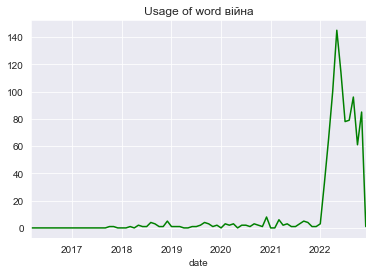

In [114]:
#usage of word війна
import matplotlib.pyplot as plt
import datetime

df1 = df1[df1['message'].notna()]
df1["date"] = pd.to_datetime(df1['date'], errors='coerce')

word_count = df1["message"].apply(lambda row: row.count("війна")).rename('word_count')
combined = pd.concat([df["date"], word_count], axis = 1)

yearmonth = combined["date"].apply(lambda row: datetime.datetime.strptime(f'{row.month}/{row.year}', '%m/%Y'))
usage_grouped = combined["word_count"].groupby(yearmonth).sum()

usage_grouped.columns = ['date','Count']
usage_grouped.plot(title="Usage of word війна",
    kind = 'line',
        x = usage_grouped.index,
        y = usage_grouped.values,
        color = 'green')

<AxesSubplot: title={'center': 'Usage of word страх'}, xlabel='date'>

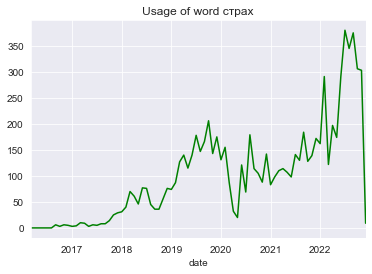

In [115]:
#usage of word страх
import matplotlib.pyplot as plt
import datetime

df1 = df1[df1['message'].notna()]
df1["date"] = pd.to_datetime(df1['date'], errors='coerce')

word_count = df1["message"].apply(lambda row: row.count("страх")).rename('word_count')
combined = pd.concat([df["date"], word_count], axis = 1)

yearmonth = combined["date"].apply(lambda row: datetime.datetime.strptime(f'{row.month}/{row.year}', '%m/%Y'))
usage_grouped = combined["word_count"].groupby(yearmonth).sum()

usage_grouped.columns = ['date','Count']
usage_grouped.plot(title="Usage of word страх",
    kind = 'line',
        x = usage_grouped.index,
        y = usage_grouped.values,
        color = 'green')

In [116]:
import nltk
from nltk.corpus import stopwords
import re
from uk_stemmer import UkStemmer
from transliterate import translit

nltk.download('stopwords')

uk_stemmer = UkStemmer()
en_stemmer = nltk.LancasterStemmer()

stopwords_ua = pd.read_csv("stopwords_ua.txt", header=None, names=['stopwords']).stopwords.values
stopwords_ua = set([uk_stemmer.stem_word(w) for w in stopwords_ua])
stopwords_ua.update(['ок', 'шо', 'хз', 'тип', 'ахах', 'ахахах', 'привіт', 'поняв', 'грн', 'ма', 'мб', 'кароч'])

stopwords_ru = set([uk_stemmer.stem_word(w) for w in stopwords.words('russian')])
stopwords_ru.update(['что'])

stopwords_en = set([en_stemmer.stem(w) for w in stopwords.words('english')])
stopwords_en.update(['https', 'com', 'frontisclear', 'turnright', 'int', 'mov', 'opt', 'ua', '_a_a'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maksymsabadyshyn/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [117]:
def tokenize(text):
    words = re.findall(r'[^\d\W]+\'?[^\d\W]+', text)
    words = [w.lower() for w in words]
    
    tokens = [uk_stemmer.stem_word(w) for w in words]
    tokens = [en_stemmer.stem(w) for w in tokens]
    
    tokens = [w for w in tokens if w not in stopwords_ua and w not in stopwords_en and w not in stopwords_ru]
    return np.array(tokens)

In [118]:
def calculate_tokens_for(category):
    
    private_dialogues_ids = list(df_meta[df_meta["type"] == category]["dialog_id"])
    private_dialogues_mask = df1["dialog_id"].apply(lambda row: row in private_dialogues_ids)
    private_dialogues = df1[private_dialogues_mask]
    years = private_dialogues["date"].apply(lambda d: d.year)
    yearly_tokens = private_dialogues["message"].apply(tokenize).groupby(years).agg(lambda s: np.concatenate(s.values))
    yearly_tokens.sort_index(inplace=True)
    
    
    fig, ax = plt.subplots(figsize=(10,5))
    width = 0.3
    year_step = width * 5 + 1
    xticks = []
    xticklabels = []
    i = 0
    
    for date in yearly_tokens.index:
        top_tokens = pd.Series(yearly_tokens.loc[date]).value_counts().head(5)
        
        x = np.array(range(top_tokens.index.size)) * width * 1.1 + i + 0.3
        ax.bar(x, top_tokens.values, width=width, label=date)
        
        xticks += list(x)
        xticklabels += top_tokens.index.tolist()
                       
        i += year_step
        
    ax.set_xticks(np.array(range(yearly_tokens.index.size)) * year_step + year_step / 2)
    ax.set_xticklabels(yearly_tokens.index)
    ax.set_xticks(xticks, minor=True)
    ax.set_xticklabels(xticklabels, minor=True, rotation=90)
    ax.tick_params(axis="x", which="major", pad=60, size=0)
    
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Year")
    plt.title("Yearly trending tokens in " + category + "s")
    plt.show()

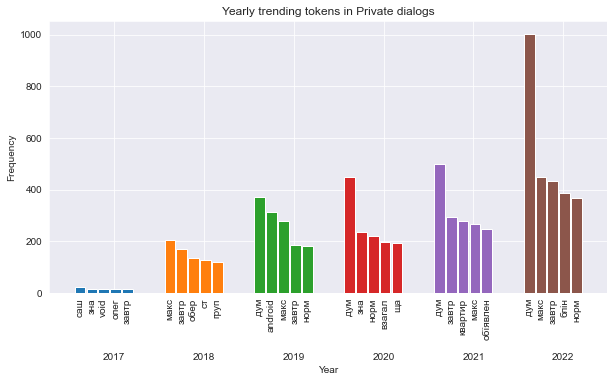

In [119]:
calculate_tokens_for("Private dialog")

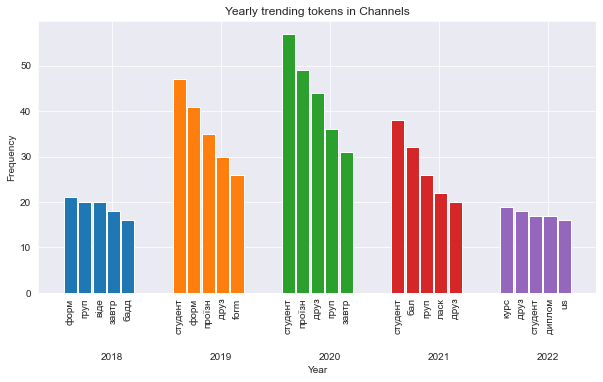

In [120]:
calculate_tokens_for("Channel")

## Homework #6.  Behaviour exploration improvement
#### Author: `Maksym Sabadyshyn`
#### Total time spent on h/w (in minutes): 650

In [121]:
import nltk
import requests
import csv
import string
import pymorphy2
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maksymsabadyshyn/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maksymsabadyshyn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/maksymsabadyshyn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [122]:

url = 'https://raw.githubusercontent.com/lang-uk/tone-dict-uk/master/tone-dict-uk.tsv'
r = requests.get(url)
with open(nltk.data.path[0]+'/tone-dict-uk.tsv', 'wb') as f:
    f.write(r.content)
d = {}
with open(nltk.data.path[0]+'/tone-dict-uk.tsv', 'r') as csv_file:
    for row in csv.reader(csv_file, delimiter='\t'):
        d[row[0]] = float(row[1])
        
SIA = SentimentIntensityAnalyzer()
SIA.lexicon.update(d)

In [123]:
url = 'https://raw.githubusercontent.com/olegdubetcky/Ukrainian-Stopwords/main/ukrainian'
r = requests.get(url)
with open(nltk.data.path[0]+'/corpora/stopwords/ukrainian', 'wb') as f:
    f.write(r.content)

from nltk.corpus import stopwords
stopwords = stopwords.words("ukrainian")

morph = pymorphy2.MorphAnalyzer(lang='uk')
stop_words = frozenset(stopwords+list(string.punctuation))

def normalize(text):
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        without_stop_words = [word for word in words if not word in stop_words]
        normal_words=[]
        for token in without_stop_words:
            p = morph.parse(token)[0]
            normal_words.append(p.normal_form)
    return normal_words

def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

In [124]:
non_na_msg = df1[df1['message'].notna()]

cyrillic_mask = non_na_msg.message.apply(has_cyrillic)
cyrillic_msg = non_na_msg[cyrillic_mask]

my_id = "262442341"

messages_from_me = cyrillic_msg[cyrillic_msg["from_id"] == "PeerUser(user_id=" + my_id + ")"]
df_normalized_from_me = messages_from_me
df_normalized_from_me["normalized_msg"] = messages_from_me["message"].apply(lambda row: normalize(str(row)))
df_normalized_from_me["polarity_score"] = df_normalized_from_me["normalized_msg"].apply(lambda row: max(list(map(lambda x: {"word" : x, "score" : SIA.polarity_scores(x)["compound"] }, row)), key=lambda x:x['score'], default=0))
df_normalized_from_me = df_normalized_from_me.join(pd.json_normalize(df_normalized_from_me['polarity_score'])).drop('polarity_score', axis='columns')

<ipython-input-124-458235edffb8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_from_me["normalized_msg"] = messages_from_me["message"].apply(lambda row: normalize(str(row)))
<ipython-input-124-458235edffb8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized_from_me["polarity_score"] = df_normalized_from_me["normalized_msg"].apply(lambda row: max(list(map(lambda x: {"word" : x, "score" : SIA.polarity_scores(x)["compound"] }, row)), key=lambda x:x['score'], default=0))


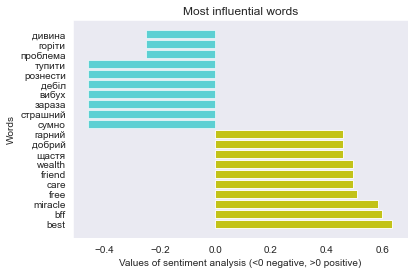

In [125]:
A = df_normalized_from_me.sort_values(by=['score'], ascending=False).drop_duplicates(subset=['word'])
B = df_normalized_from_me.sort_values(by=['score'], ascending=True).drop_duplicates(subset=['word'])

X = A["word"].head(10)
Xb = B["word"].head(10)

plt.barh(X, A["score"].head(10), align='center',
         alpha=0.9, color = 'y')
 
plt.barh(Xb, B["score"].head(10), align='center',
         alpha=0.6, color = 'c')
 
plt.grid()
plt.title("Most influential words")
plt.ylabel("Words")
plt.xlabel("Values of sentiment analysis (<0 negative, >0 positive)")
plt.show()

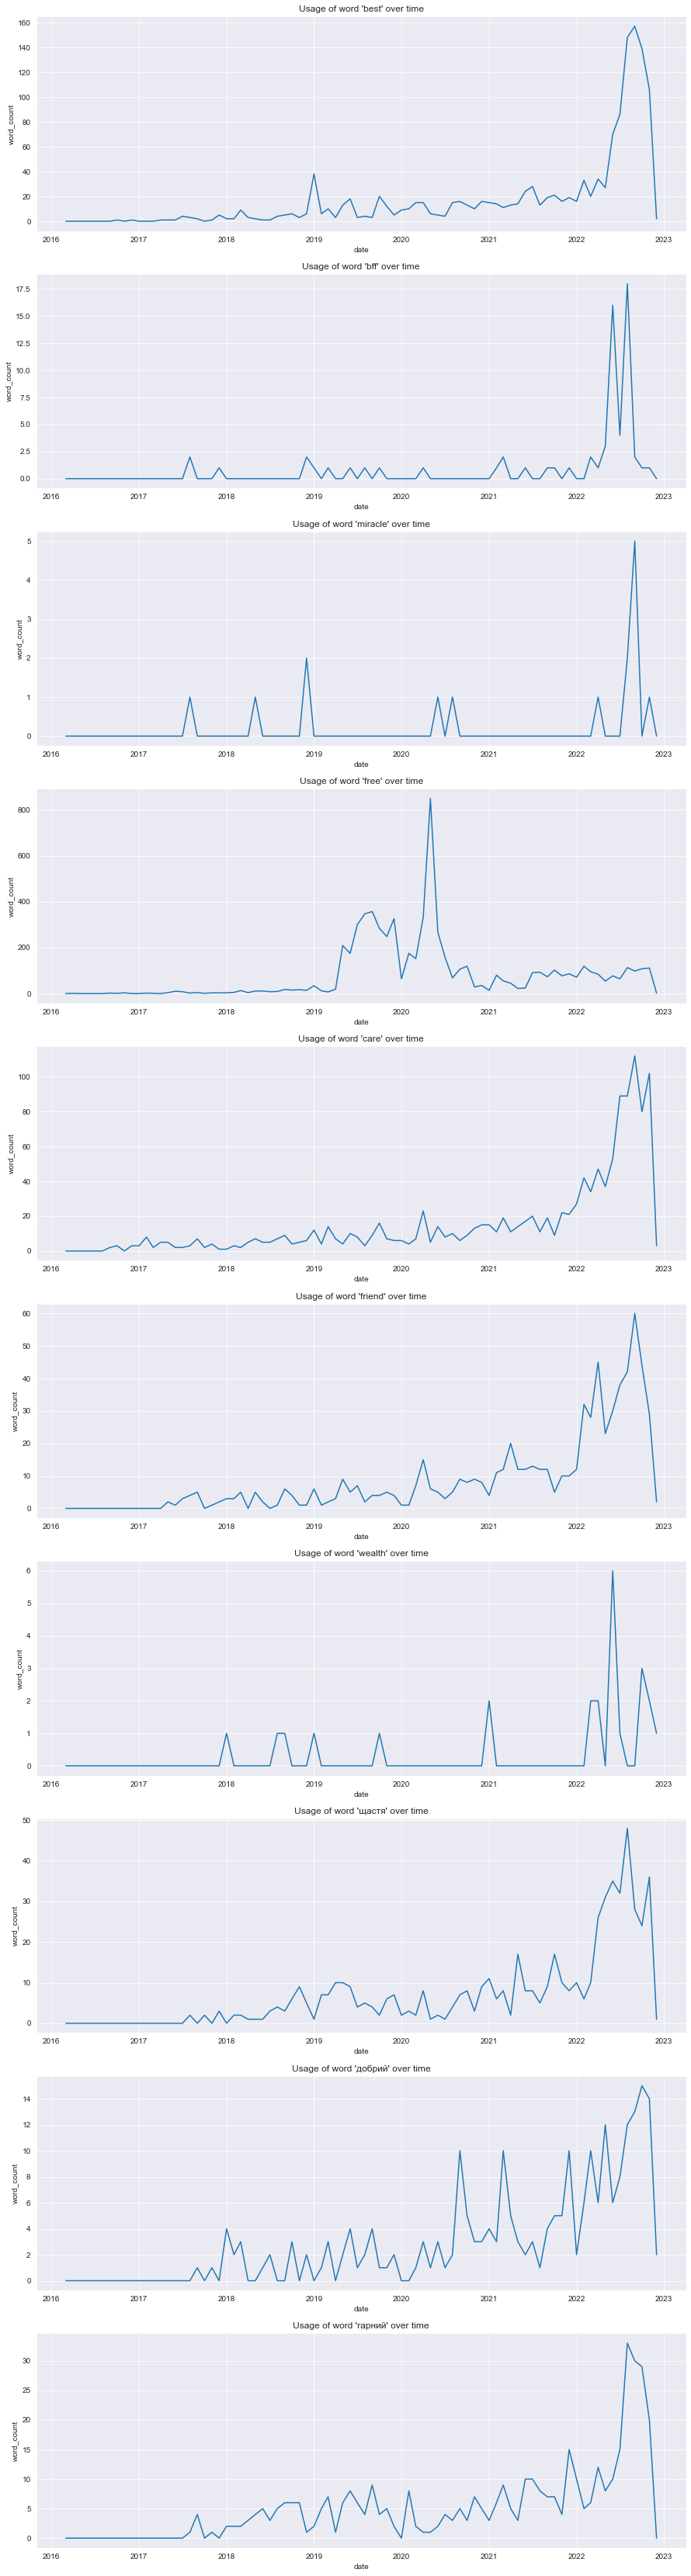

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

fig, axs = plt.subplots(nrows=len(list(X)))
fig.set_figheight(60)
fig.set_figwidth(15)

for i, word in enumerate(list(X)): 
    df1 = df1[df1['message'].notna()]
    df1["date"] = pd.to_datetime(df1['date'], errors='coerce')
    
    word_count = df1["message"].apply(lambda row: row.count(word)).rename('word_count')
    combined = pd.concat([df["date"], word_count], axis = 1)
    
    yearmonth = combined["date"].apply(lambda row: datetime.datetime.strptime(f'{row.month}/{row.year}', '%m/%Y'))
    usage_grouped = combined["word_count"].groupby(yearmonth).sum().reset_index()

    sns.set_style("darkgrid")
    sns.lineplot(data = usage_grouped, x = "date", y = "word_count", ax=axs[i]).set(title='Usage of word \'' + word + "\' over time")

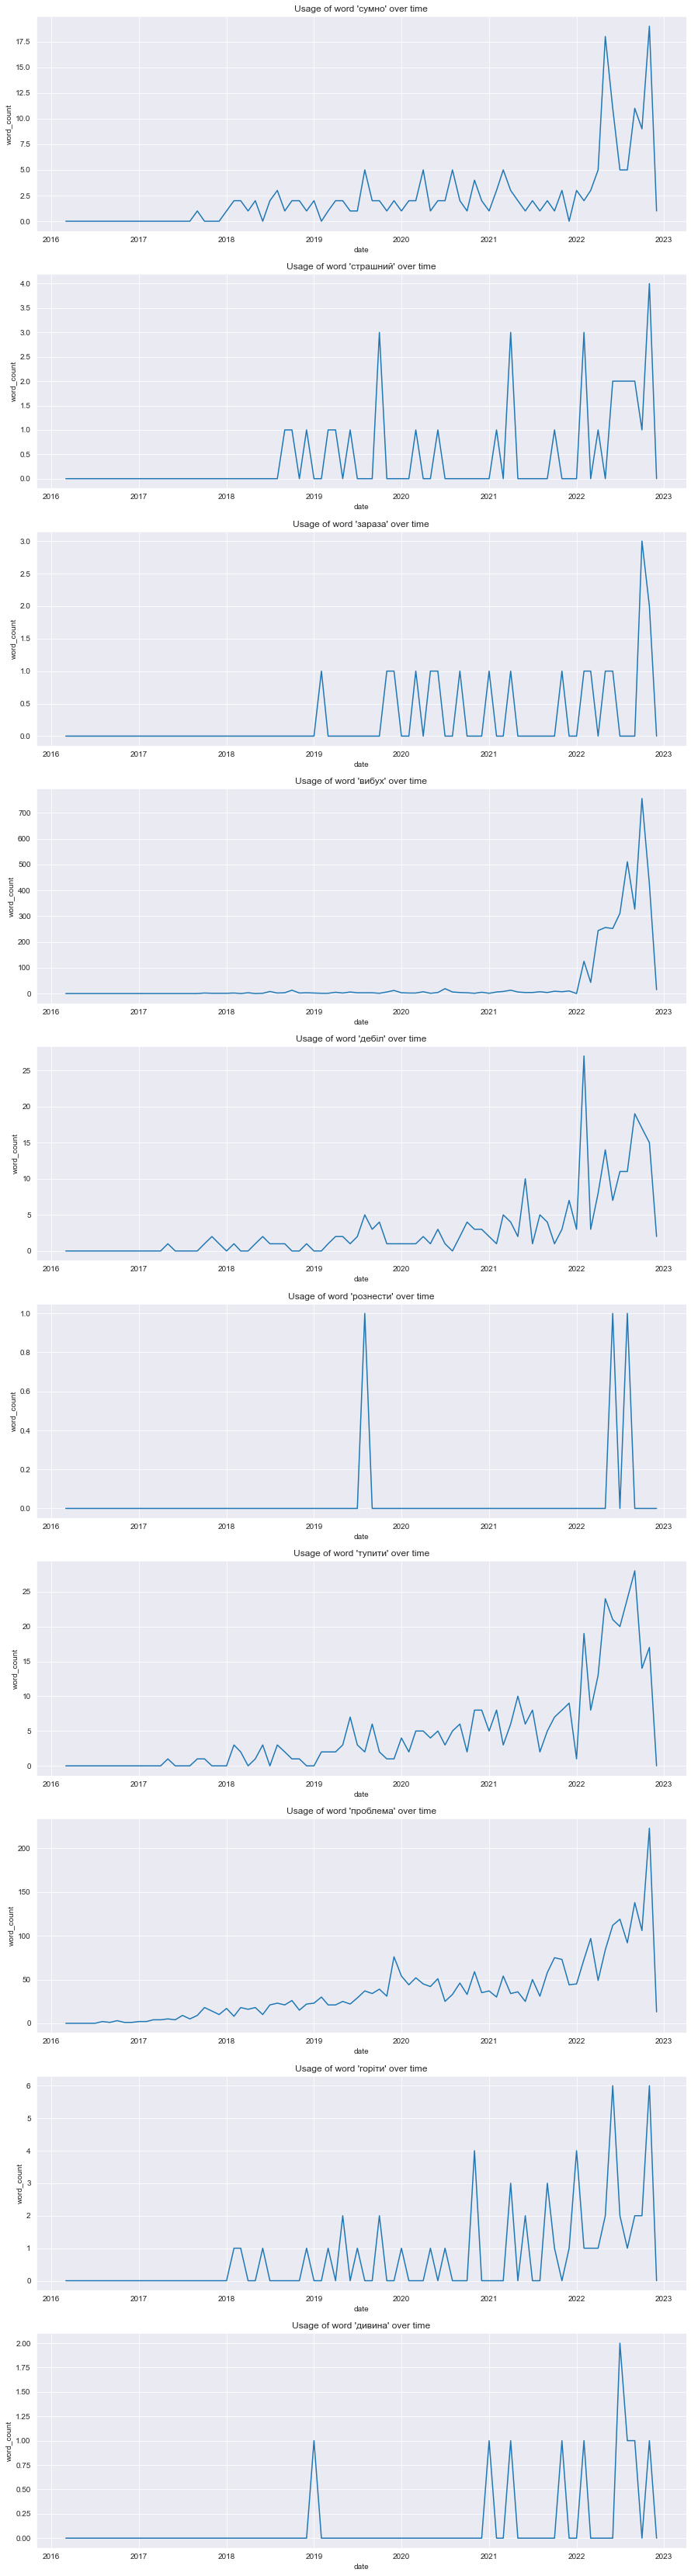

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

fig, axs = plt.subplots(nrows=len(list(Xb)))
fig.set_figheight(60)
fig.set_figwidth(15)

for i, word in enumerate(list(Xb)): 
    df1 = df1[df1['message'].notna()]
    df1["date"] = pd.to_datetime(df1['date'], errors='coerce')
    
    word_count = df1["message"].apply(lambda row: row.count(word)).rename('word_count')
    combined = pd.concat([df["date"], word_count], axis = 1)
    
    yearmonth = combined["date"].apply(lambda row: datetime.datetime.strptime(f'{row.month}/{row.year}', '%m/%Y'))
    usage_grouped = combined["word_count"].groupby(yearmonth).sum().reset_index()

    sns.set_style("darkgrid")
    sns.lineplot(data = usage_grouped, x = "date", y = "word_count", ax=axs[i]).set(title='Usage of word \'' + word + "\' over time")

[Text(0.5, 1.0, 'Days with most number of messages')]

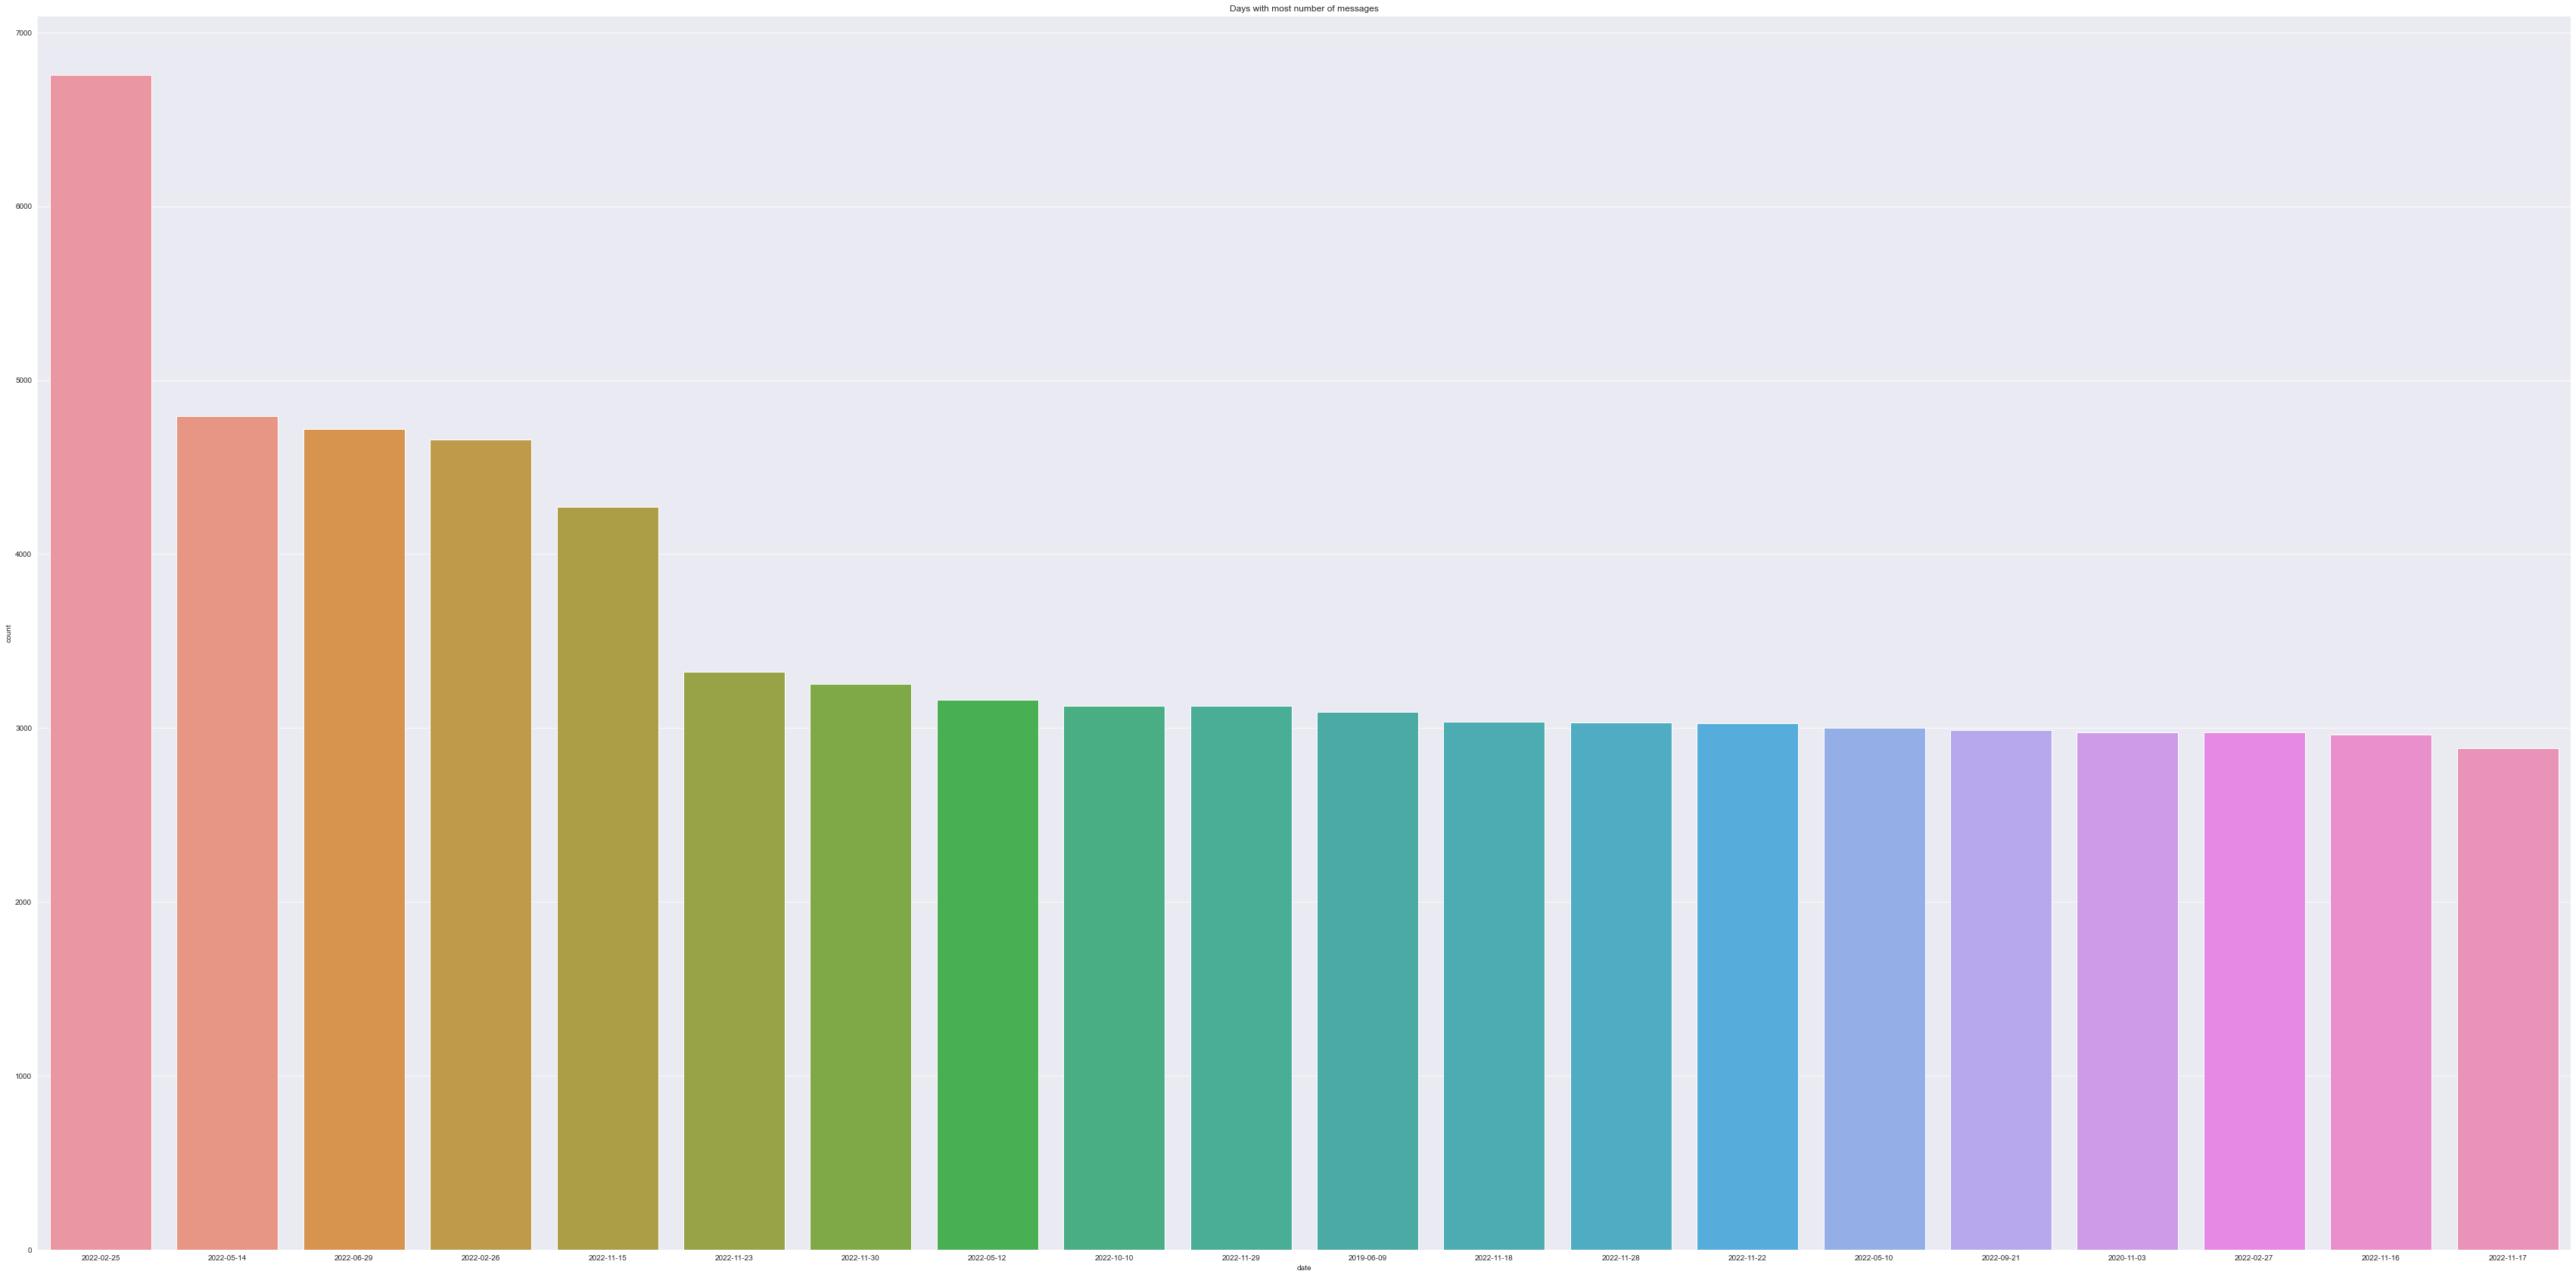

In [128]:
import seaborn as sns

df1["date"] = pd.to_datetime(df1['date'], errors='coerce')

df2 = df1['date'].dt.date.value_counts().sort_index().reset_index()
df2.columns = ['date','count']

top20 = df2.sort_values(by='count', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,5))

fig.set_figheight(30)
fig.set_figwidth(60)

sns.barplot(data=top20, x="date", y="count").set(title="Days with most number of messages")

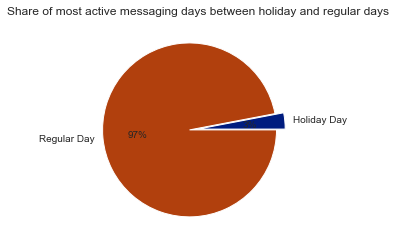

In [129]:
import holidays
import seaborn

ukrainian = holidays.UA()
df2["holiday"] = df2["date"].apply(lambda r: ukrainian.get(r))

top100 = df2.sort_values(by='count', ascending=False).head(100)

number_of_holiday_messages = len(list(top100[top100["holiday"] != "None"]))
data = [number_of_holiday_messages, 100 - number_of_holiday_messages]
keys = ['Holiday Day', 'Regular Day']
  

explode = [0, 0.1]

palette_color = seaborn.color_palette('dark')
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.title("Share of most active messaging days between holiday and regular days")
  
plt.show()

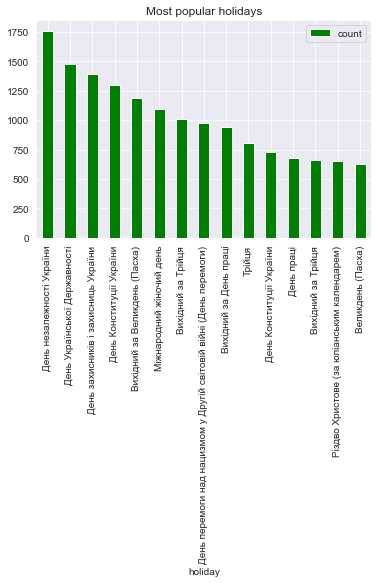

In [130]:
import seaborn as sns
df1["date"] = pd.to_datetime(df1['date'], errors='coerce')

df2 = df1['date'].dt.date.value_counts().sort_index().reset_index()
df2.columns = ['date','count']

df2["holiday"] = df2["date"].apply(lambda r: ukrainian.get(r))
top_holidays = df2[df2['holiday'].notna()].sort_values(by='count', ascending=False).head(15)

top_holidays.plot(kind = 'bar',
        x = 'holiday',
        y = 'count',
        color = 'green')
  
plt.title('Most popular holidays')
plt.show()

<ipython-input-131-0b95d46a5041>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages_from_me["date"] = pd.to_datetime(df1['date'], errors='coerce')
<ipython-input-131-0b95d46a5041>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages_from_me["hours"] = messages_from_me["date"].dt.hour
<ipython-input-131-0b95d46a5041>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

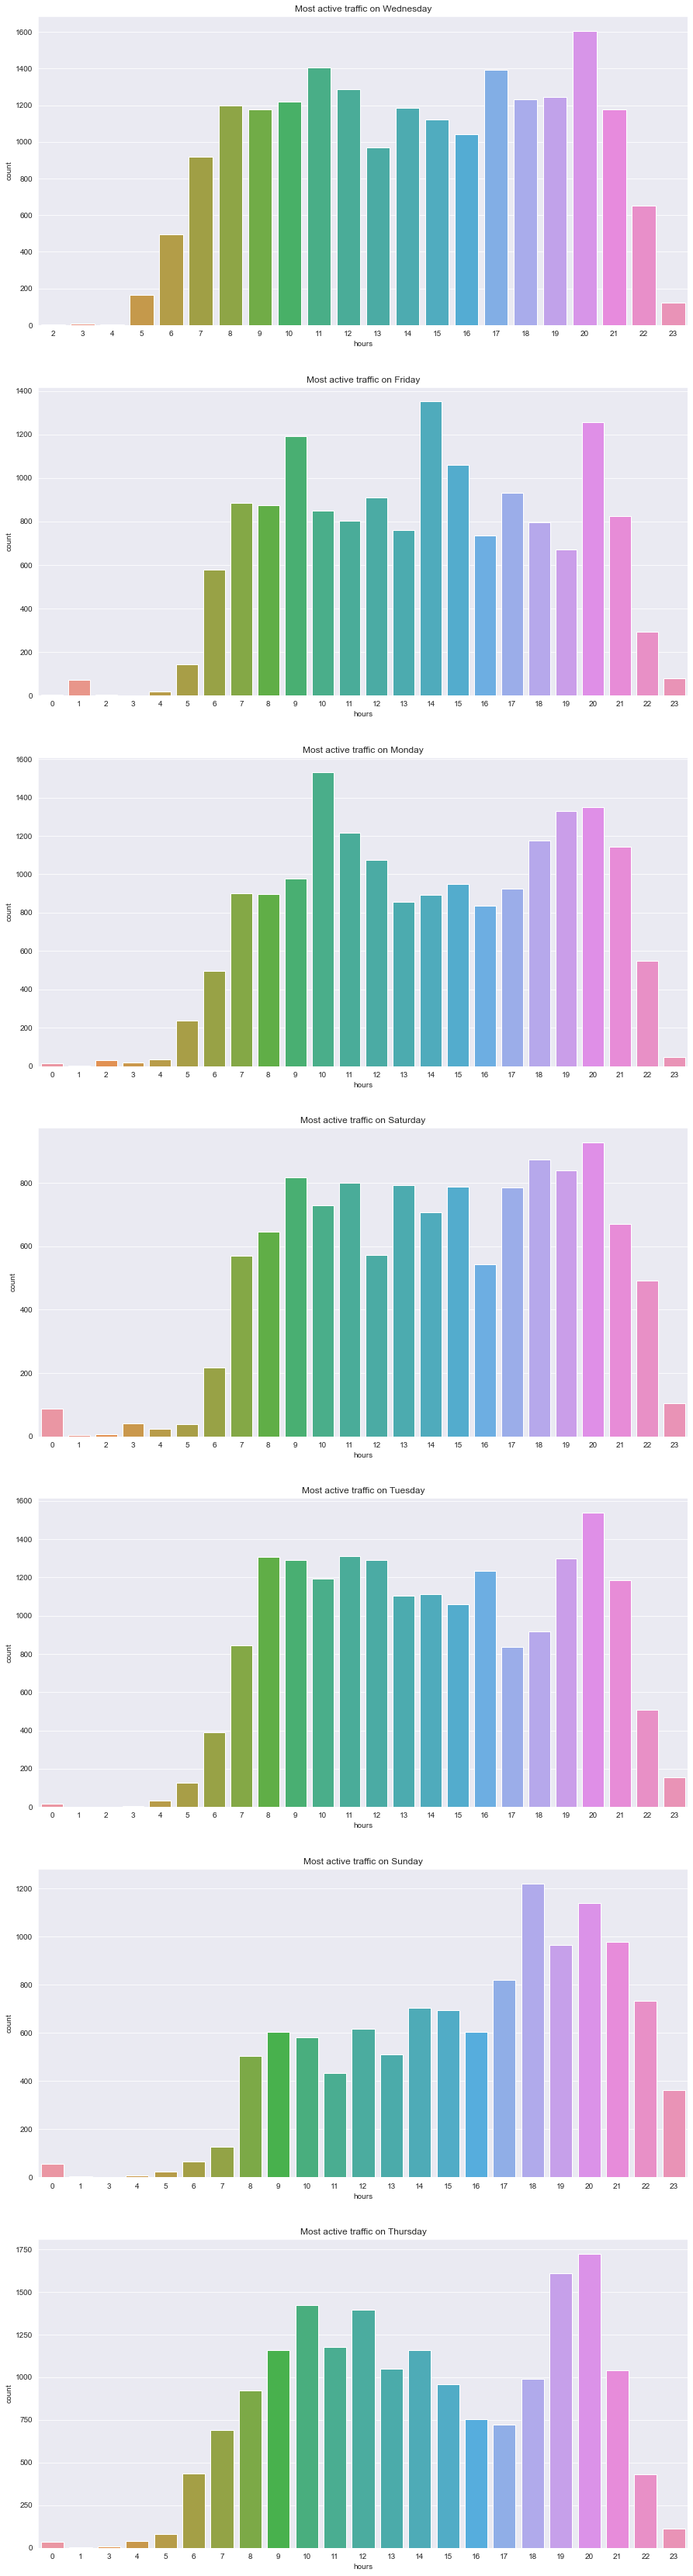

In [131]:
my_id = "262442341"
messages_from_me = df1[df1["from_id"] == "PeerUser(user_id=" + my_id + ")"]
messages_from_me["date"] = pd.to_datetime(df1['date'], errors='coerce')
messages_from_me["hours"] = messages_from_me["date"].dt.hour
messages_from_me["day_name"] = messages_from_me["date"].dt.strftime("%A")

fig, axs = plt.subplots(nrows=len(set(messages_from_me["day_name"])))
fig.set_figheight(60)
fig.set_figwidth(15)

for i, day in enumerate(set(messages_from_me["day_name"])):
    day_df = messages_from_me[messages_from_me["day_name"] == day]
    
    grouped = day_df.groupby("hours")["day_name"].count().reset_index()
    grouped.columns = ['hours','count']
    
    sns.set_style("darkgrid")
    sns.barplot(data=grouped, x="hours", y="count", ax=axs[i]).set(title='Most active traffic on ' + day)